# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [18]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key
print(weather_api_key)

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

723f2464b17a12c7cbf954e7b0f2689b


### Generate the Cities List by Using the `citipy` Library

In [19]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 608


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [20]:
# Set the API base URL
url = 'http://api.openweathermap.org/data/2.5/weather'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'{url}?q={city}&APPID={weather_api_key}'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                           "Lat": city_lat, 
                           "Lng": city_lng, 
                           "Max Temp": city_max_temp,
                           "Humidity": city_humidity,
                           "Cloudiness": city_clouds,
                           "Wind Speed": city_wind,
                           "Country": city_country,
                           "Date": city_date})
        
        # Add a delay between API requests to avoid hitting the rate limit
        time.sleep(1)

    # If an error is experienced, skip the city
    except Exception as e:
        print(f"City {city} not found. Skipping... Error: {e}")

# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lesosibirsk
Processing Record 2 of Set 1 | waitangi
Processing Record 3 of Set 1 | port-aux-francais
Processing Record 4 of Set 1 | hermanus
Processing Record 5 of Set 1 | edinburgh of the seven seas
Processing Record 6 of Set 1 | grytviken
Processing Record 7 of Set 1 | adamstown
Processing Record 8 of Set 1 | kailua-kona
Processing Record 9 of Set 1 | susuman
Processing Record 10 of Set 1 | port lincoln
Processing Record 11 of Set 1 | bilibino
Processing Record 12 of Set 1 | ribeira grande
Processing Record 13 of Set 1 | albany
Processing Record 14 of Set 1 | ouro sogui
Processing Record 15 of Set 1 | papatowai
Processing Record 16 of Set 1 | callao
Processing Record 17 of Set 1 | dudinka
Processing Record 18 of Set 1 | bethel
Processing Record 19 of Set 1 | puerto natales
Processing Record 20 of Set 1 | coracora
Processing Record 21 of Set 1 | novaya igirma
Processing Record 22 of Set 1 | hami

Processing Record 38 of Set 4 | prachuap khiri khan
Processing Record 39 of Set 4 | bardsir
Processing Record 40 of Set 4 | udachny
Processing Record 41 of Set 4 | pandan
Processing Record 42 of Set 4 | port alfred
Processing Record 43 of Set 4 | sao gabriel da cachoeira
Processing Record 44 of Set 4 | alofi
Processing Record 45 of Set 4 | praia da vitoria
Processing Record 46 of Set 4 | tommot
Processing Record 47 of Set 4 | smara
Processing Record 48 of Set 4 | merritt
Processing Record 49 of Set 4 | katabu
Processing Record 0 of Set 5 | fuerte olimpo
Processing Record 1 of Set 5 | aasiaat
Processing Record 2 of Set 5 | kununurra
Processing Record 3 of Set 5 | xilin hot
Processing Record 4 of Set 5 | bijie
Processing Record 5 of Set 5 | sao joao batista
Processing Record 6 of Set 5 | cidade velha
Processing Record 7 of Set 5 | avarua
Processing Record 8 of Set 5 | palikir - national government center
Processing Record 9 of Set 5 | costa rica
Processing Record 10 of Set 5 | kingston
P

Processing Record 33 of Set 8 | lompoc
Processing Record 34 of Set 8 | canal winchester
Processing Record 35 of Set 8 | nishinoomote
Processing Record 36 of Set 8 | port douglas
Processing Record 37 of Set 8 | vetovo
Processing Record 38 of Set 8 | genzano di lucania
Processing Record 39 of Set 8 | beira
Processing Record 40 of Set 8 | daru
Processing Record 41 of Set 8 | uliastay
Processing Record 42 of Set 8 | sual
Processing Record 43 of Set 8 | haiku-pauwela
Processing Record 44 of Set 8 | el calafate
Processing Record 45 of Set 8 | bethal
Processing Record 46 of Set 8 | isla vista
Processing Record 47 of Set 8 | shakawe
Processing Record 48 of Set 8 | fort bragg
Processing Record 49 of Set 8 | mirny
Processing Record 0 of Set 9 | semdinli
Processing Record 1 of Set 9 | robore
Processing Record 2 of Set 9 | northam
Processing Record 3 of Set 9 | whyalla norrie
City whyalla norrie not found. Skipping... Error: 'coord'
Processing Record 4 of Set 9 | rongelap
Processing Record 5 of Se

Processing Record 14 of Set 12 | patti
Processing Record 15 of Set 12 | karachi
Processing Record 16 of Set 12 | tabou
Processing Record 17 of Set 12 | quepos
Processing Record 18 of Set 12 | sabang
Processing Record 19 of Set 12 | kapuskasing
Processing Record 20 of Set 12 | saint-philippe
Processing Record 21 of Set 12 | tazacorte
Processing Record 22 of Set 12 | loriol-sur-drome
Processing Record 23 of Set 12 | cartagena
Processing Record 24 of Set 12 | hengchun
Processing Record 25 of Set 12 | midvagur
Processing Record 26 of Set 12 | mtambile
Processing Record 27 of Set 12 | tsiombe
Processing Record 28 of Set 12 | remire-montjoly
Processing Record 29 of Set 12 | magadan
Processing Record 30 of Set 12 | kuragino
Processing Record 31 of Set 12 | gadzhiyevo
Processing Record 32 of Set 12 | gazi
Processing Record 33 of Set 12 | dunay
Processing Record 34 of Set 12 | aroeiras
Processing Record 35 of Set 12 | kerikeri
Processing Record 36 of Set 12 | tadine
Processing Record 37 of Set 

In [25]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()


City          591
Lat           591
Lng           591
Max Temp      591
Humidity      591
Cloudiness    591
Wind Speed    591
Country       591
Date          591
dtype: int64

In [26]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,lesosibirsk,58.2358,92.4828,264.77,96,99,1.65,RU,1707255276
1,waitangi,-43.9535,-176.5597,292.49,89,97,2.24,NZ,1707254879
2,port-aux-francais,-49.3500,70.2167,279.20,90,100,11.14,TF,1707254882
3,hermanus,-34.4187,19.2345,292.48,79,36,7.01,ZA,1707255280
4,edinburgh of the seven seas,-37.0676,-12.3116,290.32,66,54,2.78,SH,1707255179


In [27]:
import os

# Specify the directory path
output_directory = 'output_data'

# Check if the directory exists, and create it if it doesn't
if not os.path.exists(output_directory):
    os.makedirs(output_directory)

In [28]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [29]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,lesosibirsk,58.2358,92.4828,264.77,96,99,1.65,RU,1707255276
1,waitangi,-43.9535,-176.5597,292.49,89,97,2.24,NZ,1707254879
2,port-aux-francais,-49.3500,70.2167,279.20,90,100,11.14,TF,1707254882
3,hermanus,-34.4187,19.2345,292.48,79,36,7.01,ZA,1707255280
4,edinburgh of the seven seas,-37.0676,-12.3116,290.32,66,54,2.78,SH,1707255179


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

In [30]:
import requests
import time

# Set the API base URL
url = 'http://api.openweathermap.org/data/2.5/weather'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'{url}?q={city}&APPID={weather_api_key}'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                           "Lat": city_lat, 
                           "Lng": city_lng, 
                           "Max Temp": city_max_temp,
                           "Humidity": city_humidity,
                           "Cloudiness": city_clouds,
                           "Wind Speed": city_wind,
                           "Country": city_country,
                           "Date": city_date})
        
        # Add a delay between API requests to avoid hitting the rate limit
        time.sleep(1)

    # If an error is experienced, skip the city
    except Exception as e:
        print(f"City {city} not found. Skipping... Error: {e}")

# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lesosibirsk
Processing Record 2 of Set 1 | waitangi
Processing Record 3 of Set 1 | port-aux-francais
Processing Record 4 of Set 1 | hermanus
Processing Record 5 of Set 1 | edinburgh of the seven seas
Processing Record 6 of Set 1 | grytviken
Processing Record 7 of Set 1 | adamstown
Processing Record 8 of Set 1 | kailua-kona
Processing Record 9 of Set 1 | susuman
Processing Record 10 of Set 1 | port lincoln
Processing Record 11 of Set 1 | bilibino
Processing Record 12 of Set 1 | ribeira grande
Processing Record 13 of Set 1 | albany
Processing Record 14 of Set 1 | ouro sogui
Processing Record 15 of Set 1 | papatowai
Processing Record 16 of Set 1 | callao
Processing Record 17 of Set 1 | dudinka
Processing Record 18 of Set 1 | bethel
Processing Record 19 of Set 1 | puerto natales
Processing Record 20 of Set 1 | coracora
Processing Record 21 of Set 1 | novaya igirma
Processing Record 22 of Set 1 | hami

Processing Record 38 of Set 4 | prachuap khiri khan
Processing Record 39 of Set 4 | bardsir
Processing Record 40 of Set 4 | udachny
Processing Record 41 of Set 4 | pandan
Processing Record 42 of Set 4 | port alfred
Processing Record 43 of Set 4 | sao gabriel da cachoeira
Processing Record 44 of Set 4 | alofi
Processing Record 45 of Set 4 | praia da vitoria
Processing Record 46 of Set 4 | tommot
Processing Record 47 of Set 4 | smara
Processing Record 48 of Set 4 | merritt
Processing Record 49 of Set 4 | katabu
Processing Record 0 of Set 5 | fuerte olimpo
Processing Record 1 of Set 5 | aasiaat
Processing Record 2 of Set 5 | kununurra
Processing Record 3 of Set 5 | xilin hot
Processing Record 4 of Set 5 | bijie
Processing Record 5 of Set 5 | sao joao batista
Processing Record 6 of Set 5 | cidade velha
Processing Record 7 of Set 5 | avarua
Processing Record 8 of Set 5 | palikir - national government center
Processing Record 9 of Set 5 | costa rica
Processing Record 10 of Set 5 | kingston
P

Processing Record 33 of Set 8 | lompoc
Processing Record 34 of Set 8 | canal winchester
Processing Record 35 of Set 8 | nishinoomote
Processing Record 36 of Set 8 | port douglas
Processing Record 37 of Set 8 | vetovo
Processing Record 38 of Set 8 | genzano di lucania
Processing Record 39 of Set 8 | beira
Processing Record 40 of Set 8 | daru
Processing Record 41 of Set 8 | uliastay
Processing Record 42 of Set 8 | sual
Processing Record 43 of Set 8 | haiku-pauwela
Processing Record 44 of Set 8 | el calafate
Processing Record 45 of Set 8 | bethal
Processing Record 46 of Set 8 | isla vista
Processing Record 47 of Set 8 | shakawe
Processing Record 48 of Set 8 | fort bragg
Processing Record 49 of Set 8 | mirny
Processing Record 0 of Set 9 | semdinli
Processing Record 1 of Set 9 | robore
Processing Record 2 of Set 9 | northam
Processing Record 3 of Set 9 | whyalla norrie
City whyalla norrie not found. Skipping... Error: 'coord'
Processing Record 4 of Set 9 | rongelap
Processing Record 5 of Se

Processing Record 14 of Set 12 | patti
Processing Record 15 of Set 12 | karachi
Processing Record 16 of Set 12 | tabou
Processing Record 17 of Set 12 | quepos
Processing Record 18 of Set 12 | sabang
Processing Record 19 of Set 12 | kapuskasing
Processing Record 20 of Set 12 | saint-philippe
Processing Record 21 of Set 12 | tazacorte
Processing Record 22 of Set 12 | loriol-sur-drome
Processing Record 23 of Set 12 | cartagena
Processing Record 24 of Set 12 | hengchun
Processing Record 25 of Set 12 | midvagur
Processing Record 26 of Set 12 | mtambile
Processing Record 27 of Set 12 | tsiombe
Processing Record 28 of Set 12 | remire-montjoly
Processing Record 29 of Set 12 | magadan
Processing Record 30 of Set 12 | kuragino
Processing Record 31 of Set 12 | gadzhiyevo
Processing Record 32 of Set 12 | gazi
Processing Record 33 of Set 12 | dunay
Processing Record 34 of Set 12 | aroeiras
Processing Record 35 of Set 12 | kerikeri
Processing Record 36 of Set 12 | tadine
Processing Record 37 of Set 

#### Latitude Vs. Humidity

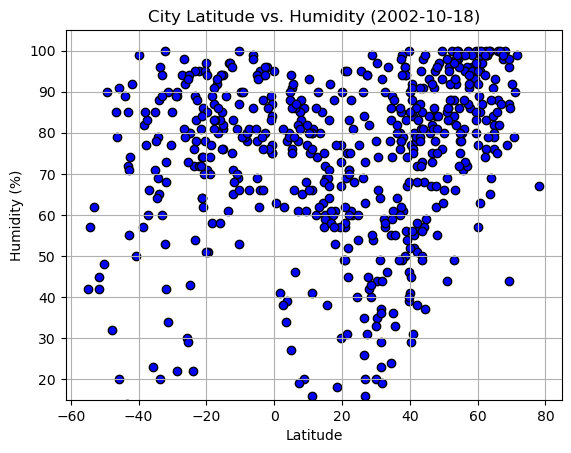

In [31]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"],edgecolors="black", facecolor="blue")
plt.title("City Latitude vs. Humidity (2002-10-18)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude") 
plt.ylim(15,105)
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

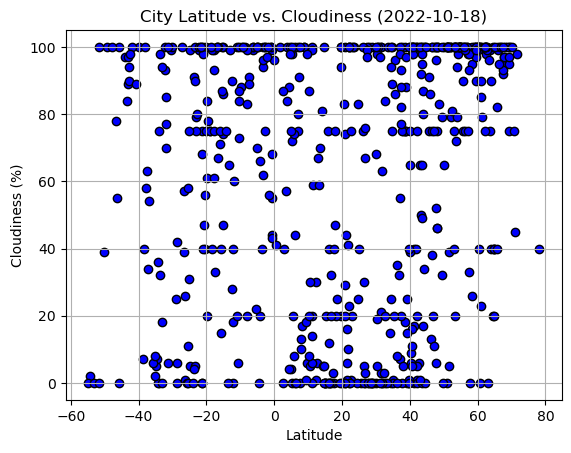

In [32]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"],edgecolors="black", facecolor="blue")
plt.title("City Latitude vs. Cloudiness (2022-10-18)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude") 
plt.grid(True,)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

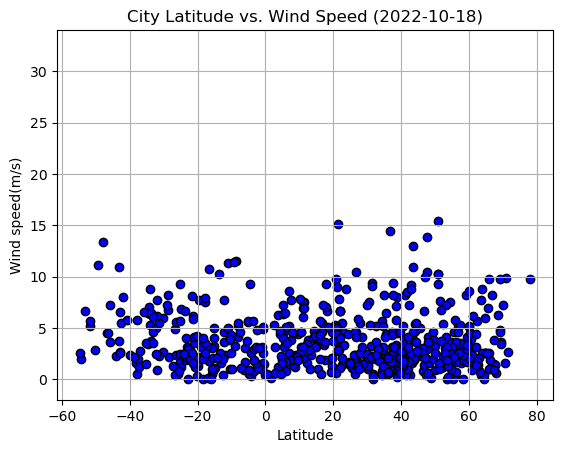

In [33]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"],edgecolors="black", facecolor="blue")
plt.title("City Latitude vs. Wind Speed (2022-10-18)")
plt.ylabel("Wind speed(m/s)")
plt.xlabel("Latitude") 
plt.ylim(-2,34)
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [34]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values,y_values,title,text_coordinates):
    (slope, intercept, r_value, p_value, stderr) = linregress(x_values, y_values)
    regress_values=x_values*slope+intercept
    line_eq="y="+str(round(slope,2))+"x+"+str(round(intercept,2))
    r_value="r="+str((r_value))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.xlabel("Lat")
    plt.ylabel(title)
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red",)
    x,y=text_coordinates
    plt.annotate(r_value,(x,y-5),fontsize=12,color="black")
    plt.show()

In [35]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,lesosibirsk,58.2358,92.4828,264.77,96,99,1.65,RU,1707255276
7,kailua-kona,19.6406,-155.9956,300.53,67,20,4.63,US,1707255284
8,susuman,62.7833,148.1667,239.81,99,99,1.34,RU,1707254930
10,bilibino,68.0546,166.4372,236.86,100,100,0.62,RU,1707255142
11,ribeira grande,38.5167,-28.7000,290.37,94,75,5.81,PT,1707255171


In [36]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,waitangi,-43.9535,-176.5597,292.49,89,97,2.24,NZ,1707254879
2,port-aux-francais,-49.3500,70.2167,279.20,90,100,11.14,TF,1707254882
3,hermanus,-34.4187,19.2345,292.48,79,36,7.01,ZA,1707255280
4,edinburgh of the seven seas,-37.0676,-12.3116,290.32,66,54,2.78,SH,1707255179
5,grytviken,-54.2811,-36.5092,282.97,57,2,1.92,GS,1707254883


###  Temperature vs. Latitude Linear Regression Plot

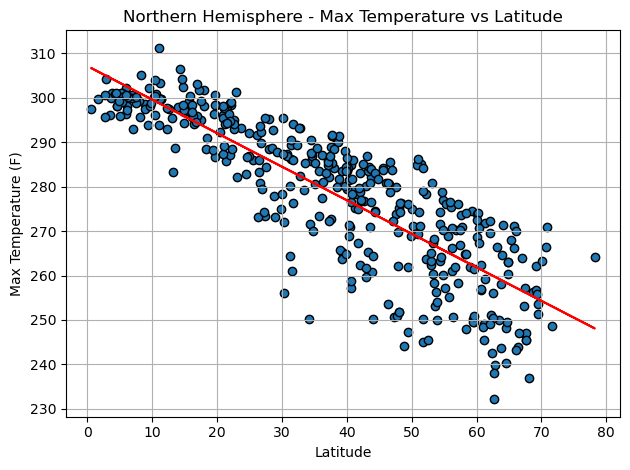

Correlation coefficient (r-value): -0.8450033742250767


In [47]:
# Linear regression on Northern Hemisphere

# Perform linear regression on the Northern Hemisphere data
slope, intercept, r_value, _, _ = linregress(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])

# Calculate the regression line
regress_values = slope * northern_hemi_df['Lat'] + intercept

# Plot the data and regression line
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'], marker='o', edgecolors='black')
plt.plot(northern_hemi_df['Lat'], regress_values, color='red')

# Label the plot
plt.title('Northern Hemisphere - Max Temperature vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()

# Print the r-value
print(f"Correlation coefficient (r-value): {r_value}")

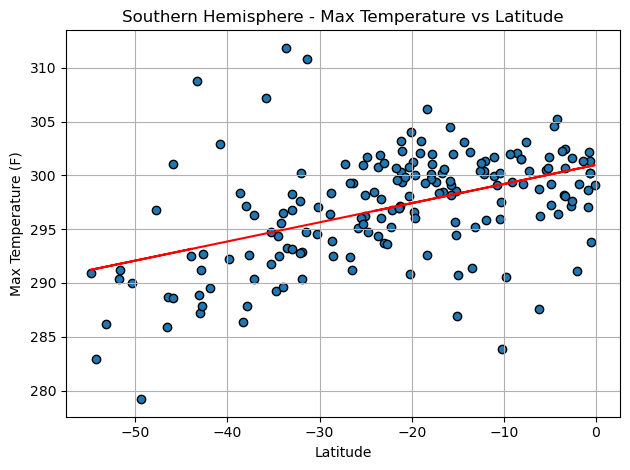

Correlation coefficient (r-value): 0.46991527065804295


In [48]:
# Linear regression on Southern Hemisphere


# Perform linear regression on the Southern Hemisphere data
slope, intercept, r_value, _, _ = linregress(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'])

# Calculate the regression line
regress_values = slope * southern_hemi_df['Lat'] + intercept

# Plot the data and regression line
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], marker='o', edgecolors='black')
plt.plot(southern_hemi_df['Lat'], regress_values, color='red')

# Label the plot
plt.title('Southern Hemisphere - Max Temperature vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()

# Print the r-value
print(f"Correlation coefficient (r-value): {r_value}")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

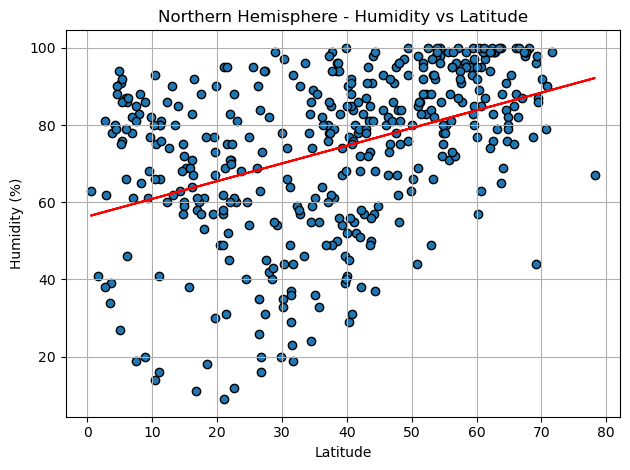

Correlation coefficient (r-value): 0.4112224152888124


In [49]:
# Northern Hemisphere
 
# Perform linear regression on the Northern Hemisphere data
slope, intercept, r_value, _, _ = linregress(northern_hemi_df['Lat'], northern_hemi_df['Humidity'])

# Calculate the regression line
regress_values = slope * northern_hemi_df['Lat'] + intercept

# Plot the data and regression line
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Humidity'], marker='o', edgecolors='black')
plt.plot(northern_hemi_df['Lat'], regress_values, color='red')

# Label the plot
plt.title('Northern Hemisphere - Humidity vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()

# Print the r-value
print(f"Correlation coefficient (r-value): {r_value}")


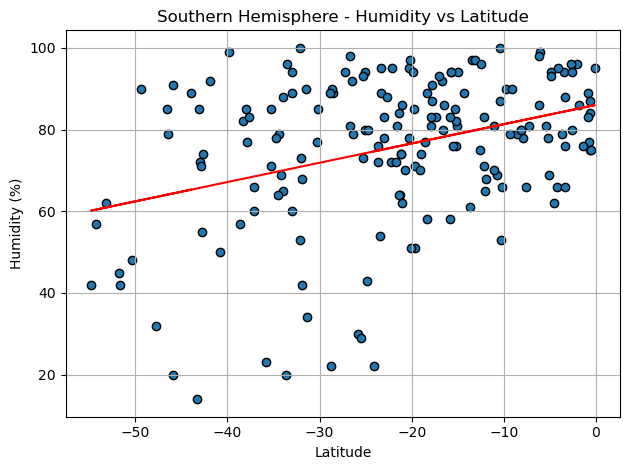

Correlation coefficient (r-value): 0.35468836003796245


In [50]:
# Southern Hemisphere

# Perform linear regression on the Southern Hemisphere data
slope, intercept, r_value, _, _ = linregress(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])

# Calculate the regression line
regress_values = slope * southern_hemi_df['Lat'] + intercept

# Plot the data and regression line
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Humidity'], marker='o', edgecolors='black')
plt.plot(southern_hemi_df['Lat'], regress_values, color='red')

# Label the plot
plt.title('Southern Hemisphere - Humidity vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()

# Print the r-value
print(f"Correlation coefficient (r-value): {r_value}")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

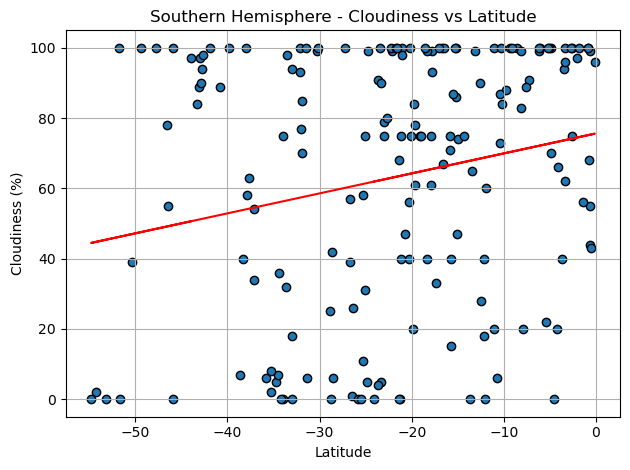

Correlation coefficient (r-value): 0.2143904314753685


In [51]:
# Southern Hemisphere
# Perform linear regression on the Southern Hemisphere data
slope, intercept, r_value, _, _ = linregress(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'])

# Calculate the regression line
regress_values = slope * southern_hemi_df['Lat'] + intercept

# Plot the data and regression line
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'], marker='o', edgecolors='black')
plt.plot(southern_hemi_df['Lat'], regress_values, color='red')

# Label the plot
plt.title('Southern Hemisphere - Cloudiness vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()

# Print the r-value
print(f"Correlation coefficient (r-value): {r_value}")

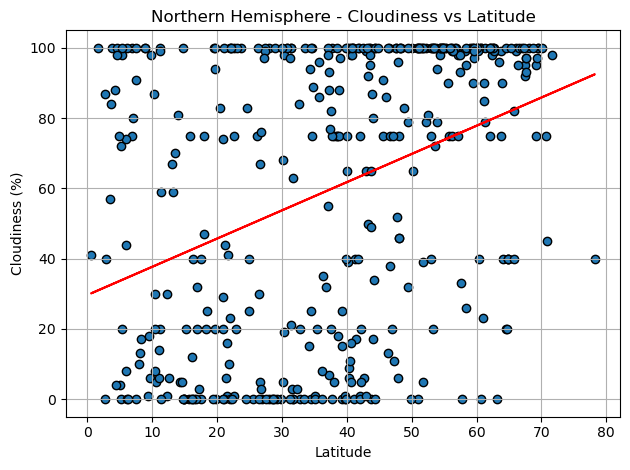

(r-value): 0.37498006698339514


In [52]:
# Northern Hemisphere

# Perform linear regression on the Northern Hemisphere data
slope, intercept, r_value, _, _ = linregress(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])

# Calculate the regression line
regress_values = slope * northern_hemi_df['Lat'] + intercept

# Plot the data and regression line
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'], marker='o', edgecolors='black')
plt.plot(northern_hemi_df['Lat'], regress_values, color='red')

# Label the plot
plt.title('Northern Hemisphere - Cloudiness vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()

# Print the r-value
print(f"(r-value): {r_value}")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

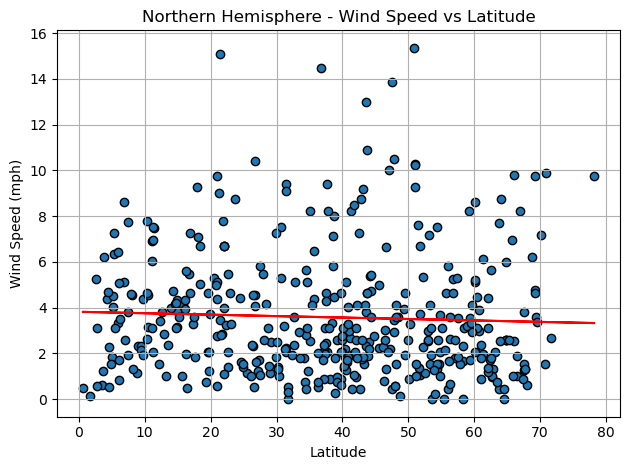

Correlation coefficient (r-value): -0.0440148539240451


In [53]:
# Northern Hemisphere

# Perform linear regression on the Northern Hemisphere data
slope, intercept, r_value, _, _ = linregress(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'])

# Calculate the regression line
regress_values = slope * northern_hemi_df['Lat'] + intercept

# Plot the data and regression line
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'], marker='o', edgecolors='black')
plt.plot(northern_hemi_df['Lat'], regress_values, color='red')

# Label the plot
plt.title('Northern Hemisphere - Wind Speed vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()

# Print the r-value
print(f"Correlation coefficient (r-value): {r_value}")

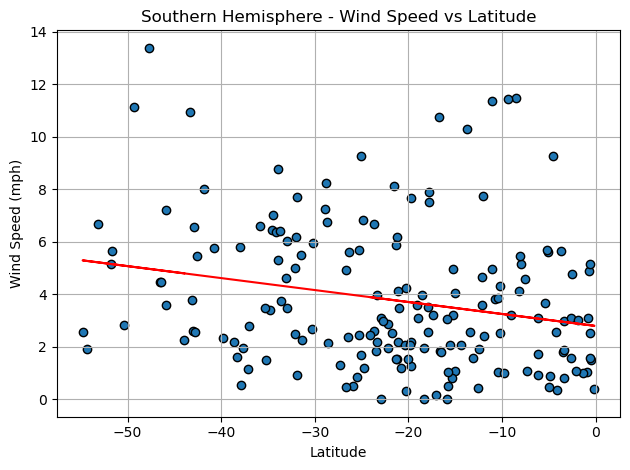

Correlation coefficient (r-value): -0.22947261271541863


In [54]:
# Southern Hemisphere

# Perform linear regression on the Southern Hemisphere data
slope, intercept, r_value, _, _ = linregress(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'])

# Calculate the regression line
regress_values = slope * southern_hemi_df['Lat'] + intercept

# Plot the data and regression line
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'], marker='o', edgecolors='black')
plt.plot(southern_hemi_df['Lat'], regress_values, color='red')

# Label the plot
plt.title('Southern Hemisphere - Wind Speed vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()

# Print the r-value
print(f"Correlation coefficient (r-value): {r_value}")

**Discussion about the linear relationship:** YOUR RESPONSE HERE